In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read and store the dataset as pandas dataframe
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
# Data preprocessing

# split features and labels of dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
n = len(X.columns)

# identify continuous features
lst1 = list()
for col in X:
    if len(X[col].unique()) > 2:
        lst1.append(col)

# scale continuous features
scaler = StandardScaler()
X[lst1] = scaler.fit_transform(X[lst1])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [4]:
# define a function to create a sequential neural network model
def get_model():
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(32, input_shape=(n,), activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(16, activation=tf.nn.tanh),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
            ])
    # compile model
    model.compile(optimizer="adam",
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=["accuracy"])
    return model

In [5]:
# create a learning rate scheduler.

def lr_scheduler(epoch):
  if epoch < 10:  # after 10 epochs, reduce learning rate
    return 0.001
  else:
    return 0.0001

In [6]:
# create deep learning model and fit dataset
nn1 = get_model()
callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
history = nn1.fit(x_train, y_train,
                  validation_data=(x_test, y_test),
                  batch_size=5, epochs=100,
                  callbacks=[callback])

Epoch 1/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6276 - val_loss: 0.5838 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 2/100
48/48 [==============================] - 0s 665us/step - loss: 0.5887 - accuracy: 0.7155 - val_loss: 0.5313 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 3/100
48/48 [==============================] - 0s 997us/step - loss: 0.5145 - accuracy: 0.7741 - val_loss: 0.4947 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7908 - val_loss: 0.4638 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.7908 - val_loss: 0.4393 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.7824 - val_loss: 0.

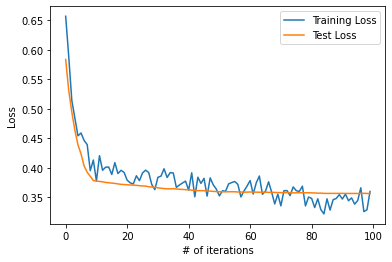

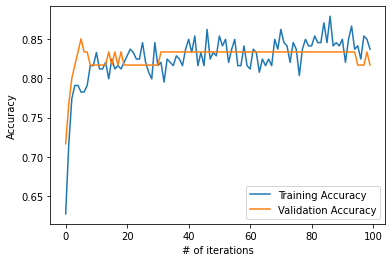

In [7]:
# plot training and validation loss over iterations
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.xlabel("# of iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot training and validation accuracy over iterations
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("# of iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
# cross validation part

# shuffle dataset for randomization
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# preprocess dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
scaler = StandardScaler()
X[lst1] = scaler.fit_transform(X[lst1])

# perform cross validation
kr = KerasClassifier(build_fn=get_model)
scores = cross_val_score(kr, X, y, cv=5, n_jobs=-1, fit_params=dict(epochs=100, batch_size=5))
print("Cross validation scores:", scores)
print(f"Best accuracy : {max(scores)}")
print(f"Average accuracy: {np.mean(scores)}")


C:\Users\mguls\PycharmProjects\YZV\venv\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]


Cross validation scores: [0.71666664 0.76666665 0.86666667 0.86666667 0.779661  ]
Best accuracy : 0.8666666746139526
Average accuracy: 0.7992655277252197
